# Visualize results and raw data

## Visualize the datasets (papers / year)

In [3]:
from pathlib import Path

import pandas as pd

RESULTS_FOLDER = Path("../results/")

# load the data frames
df_arxiv = pd.read_csv(RESULTS_FOLDER / 'arxiv_2024-06-26_14-50-21.csv')
df_springer = pd.read_csv(RESULTS_FOLDER / 'springer_2024-06-26_14-45-54.csv')
df_ieee = pd.read_csv(RESULTS_FOLDER / 'IEEE_export2024.06.26-16.05.03.csv')
df_acm = pd.read_csv(RESULTS_FOLDER / 'acm_export2024.06.26-17.35.csv')
df_science_direct = pd.read_csv(RESULTS_FOLDER / 'ScienceDirect_2024-06-26_17-18-04.csv')
df_web_of_science = pd.read_csv(RESULTS_FOLDER / 'webofscience_2024-06-26_16-57-54.csv')

# add source to all data frames
df_arxiv['source'] = 'arxiv'
df_springer['source'] = 'springer'
df_ieee['source'] = 'ieee'
df_acm['source'] = 'acm'
df_science_direct['source'] = 'science_direct'
df_web_of_science['source'] = 'web_of_science'

# add or rename URL column
df_springer['url'] = df_springer['link'].apply(
    lambda x: x if "link.springer.com" in x else "https://link.springer.com" + x)
df_ieee = df_ieee.rename(columns={'PDF Link': 'url'})
df_web_of_science = df_web_of_science.rename(columns={'DOI Link': 'url'})

# add year column to data frames
df_arxiv['year'] = df_arxiv['published'].apply(lambda x: x.split("-")[0].strip())
df_springer['year'] = df_springer['published'].apply(lambda x: x.split(" ")[-1].strip())
df_ieee['year'] = df_ieee['Publication Year'].apply(lambda x: str(x).strip())
df_science_direct['year'] = df_science_direct['year'].astype(str)
df_acm['year'] = df_acm['year'].astype(str)
df_web_of_science['year'] = df_web_of_science['Publication Year'].apply(lambda x: str(x).strip())

# print counts
print(f"Arxiv # papers: {df_arxiv.shape}")
print(f"Springer # papers: {df_springer.shape}")
print(f"IEEE # papers: {df_ieee.shape}")
print(f"ACM # papers: {df_acm.shape}")
print(f"Science Direct # papers: {df_science_direct.shape}")
print(f"Web of Science # papers: {df_web_of_science.shape}")

Arxiv # papers: (162, 8)
Springer # papers: (241, 9)
IEEE # papers: (73, 30)
ACM # papers: (1013, 27)
Science Direct # papers: (387, 22)
Web of Science # papers: (74, 74)


In [4]:
# count numbers of papers per year
df_arxiv_year = df_arxiv.groupby('year').count()
df_springer_year = df_springer.groupby('year').count()
df_ieee_year = df_ieee.groupby('year').count()
df_acm_year = df_acm.groupby('year').count()
df_science_direct_year = df_science_direct.groupby('year').count()
df_web_of_science_year = df_web_of_science.groupby('year').count()

# remove unnecessary columns
df_arxiv_year = df_arxiv_year[['title']]
df_springer_year = df_springer_year[['title']]
df_ieee_year = df_ieee_year[['Document Title']]
df_ieee_year = df_ieee_year.rename(columns={'Document Title': 'title'})
df_acm_year = df_acm_year[['title']]
df_science_direct_year = df_science_direct_year[['title']]
df_web_of_science_year = df_web_of_science_year[['Article Title']]
df_web_of_science_year = df_web_of_science_year.rename(columns={'Article Title': 'title'})

# merge the counts
df_arxiv_year = df_arxiv_year.rename(columns={'title': 'arxiv'})
df_springer_year = df_springer_year.rename(columns={'title': 'springer'})
df_ieee_year = df_ieee_year.rename(columns={'title': 'ieee'})
df_acm_year = df_acm_year.rename(columns={'title': 'acm'})
df_science_direct_year = df_science_direct_year.rename(columns={'title': 'science_direct'})
df_web_of_science_year = df_web_of_science_year.rename(columns={'title': 'web_of_science'})

df_merged = pd.concat([df_arxiv_year['arxiv'], df_springer_year['springer'], df_ieee_year['ieee'], df_acm_year['acm'],
                       df_science_direct_year['science_direct'], df_web_of_science_year['web_of_science']], axis=1)
df_merged = df_merged.fillna(0)
df_merged = df_merged.astype(int)

# sort the years
df_merged = df_merged.sort_index()
df_merged

,arxiv,springer,ieee,acm,science_direct,web_of_science
year,,,,,,
1972,0,0,0,1,0,0
1973,0,0,0,1,0,0
1977,0,0,0,1,0,0
1978,0,0,0,0,1,0
1981,0,0,0,1,2,0
1982,0,2,0,0,2,0
1984,0,0,0,0,1,0
1985,0,1,0,0,0,0
1986,0,0,0,1,0,0


In [5]:
# count the number of papers whose year >= 2014
df_merged['total'] = df_merged['arxiv'] + df_merged['springer'] + df_merged['ieee'] + df_merged['acm'] + df_merged[
    'science_direct']
all = df_merged['total'].sum()
cut_off_year = 2019
after_cut_off_year = df_merged.loc[df_merged.index.astype(int) >= cut_off_year].sum()
print(f"Total number of papers: {all}")
print(f"Number of papers after {cut_off_year}: {after_cut_off_year['total']}")

Total number of papers: 1869
Number of papers after 2019: 1737


<Axes: title={'center': 'Number of papers per year'}, xlabel='year'>

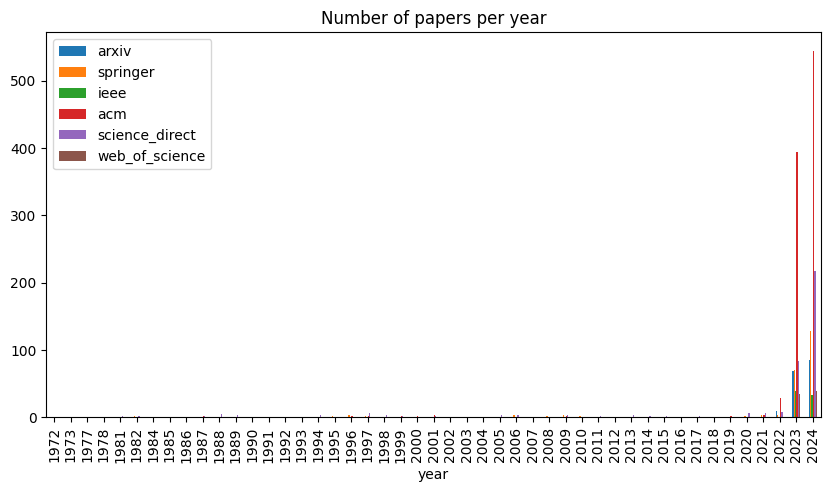

In [30]:
# exclude total column & plot
df_merged.drop(columns=['total']).loc[df_merged.index.astype(int) >= 1].plot(kind='bar', figsize=(10, 5),
                                                                             title='Number of papers per year')

## Merge the data frames
This will merge the data frames and remove duplicates.
We will keep only the columns:

In [28]:
# compute subset of the data frames
df_arxiv_subset = df_arxiv[['title', 'doi', 'year', 'source', 'url']]
df_springer_subset = df_springer[['title', 'DOI', 'year', 'source', 'url']]
df_ieee_subset = df_ieee[['Document Title', 'DOI', 'year', 'source', 'url']]
df_acm_subset = df_acm[['title', 'doi', 'year', 'source', 'url']]
df_science_direct_subset = df_science_direct[['title', 'doi', 'year', 'source', 'url']]
df_web_of_science_subset = df_web_of_science[['Article Title', 'DOI', 'year', 'source', 'url']]
#  any needed renaming
df_springer_subset = df_springer_subset.rename(columns={'DOI': 'doi'})
df_ieee_subset = df_ieee_subset.rename(columns={'Document Title': 'title', 'DOI': 'doi'})
df_web_of_science_subset = df_web_of_science_subset.rename(columns={'Article Title': 'title', 'DOI': 'doi'})
# merge the data frames
df_merged_subset = pd.concat(
    [df_arxiv_subset, df_springer_subset, df_ieee_subset, df_acm_subset, df_science_direct_subset,
     df_web_of_science_subset], ignore_index=True)
# df_merged_subset = df_merged_subset.drop_duplicates(subset=['doi'])
# df_merged_subset = df_merged_subset.drop_duplicates(subset=['title'])

# remove duplicates, but merge the source field to be a concatenation of the duplicated row values
df_merged_subset = df_merged_subset.groupby('title').agg(
    {'doi': 'first', 'year': 'first', 'source': ', '.join, 'url': 'first'}).reset_index()
df_merged_subset = df_merged_subset.drop_duplicates(subset=['title'])
# now by DOI
df_merged_subset = df_merged_subset.groupby('doi').agg(
    {'title': 'first', 'year': 'first', 'source': ', '.join, 'url': 'first'}).reset_index()
df_merged_subset = df_merged_subset.drop_duplicates(subset=['doi'])


# save to CSV starting index from 1
df_merged_subset.index = range(1, len(df_merged_subset) + 1)
# name the column index as id
df_merged_subset.index.name = 'id'
# create default values 
df_merged_subset['bibtex_id'] = None
df_merged_subset['type'] = None
df_merged_subset['is_relevant'] = None

df_merged_subset= df_merged_subset[['title','bibtex_id', 'url', 'type', 'doi', 'is_relevant', 'source', 'year']]
#                                     
df_merged_subset.to_csv("../results/llm_education_survey_paper.csv", index=True)

df_merged_subset

,title,bibtex_id,url,type,doi,is_relevant,source,year
id,,,,,,,,
1,Safety Case Practice - Meet the Challenge,None,https://link.springer.com/chapter/10.1007/1-84...,None,10.1007/1-84628-447-3_5,None,springer,2006
2,Determination of Storage Locations for Incomin...,None,https://link.springer.com/chapter/10.1007/1177...,None,10.1007/11779568_123,None,springer,2006
3,Towards a Digital Library for Language Learning,None,https://link.springer.com/chapter/10.1007/1186...,None,10.1007/11863878_29,None,springer,2006
4,Measuring Core Inflation by Multivariate Struc...,None,https://link.springer.com/chapter/10.1007/3-54...,None,10.1007/3-540-36626-1_10,None,springer,2007
5,Random Mapping Statistics,None,https://link.springer.com/chapter/10.1007/3-54...,None,10.1007/3-540-46885-4_34,None,springer,1990
...,...,...,...,...,...,...,...,...
1500,Towards a modular architecture for science fac...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00142c,None,science_direct,2023
1501,What is missing in autonomous discovery: open ...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00143a,None,science_direct,2023
1502,MaScQA: investigating materials science knowle...,None,https://www.sciencedirect.com/science/article/...,None,https://doi.org/10.1039/d3dd00188a,None,science_direct,2024


In [166]:
# find papers with the keyword 'survey' in the title (case-insensitive search)
df_surveys = df_merged_subset[df_merged_subset['title'].str.contains('survey', case=False, na=False)]
df_surveys

,title,doi,year,source
4,A Survey Study on the State of the Art of Prog...,10.48550/arXiv.2405.20183,2024,arxiv
26,A Survey on Large Language Models for Software...,10.48550/arXiv.2312.15223,2023,arxiv
83,Survey of Natural Language Processing for Educ...,10.48550/arXiv.2401.07518,2024,arxiv
85,Large Language Models on Wikipedia-Style Surve...,10.48550/arXiv.2308.10410,2023,arxiv
167,A survey on large language model based autonom...,10.1007/s11704-024-40231-1,2024,springer
176,A Large Language Model Approach to Educational...,10.1007/s40593-024-00414-0,2024,springer
199,Value-Based Adoption of ChatGPT in Agile Softw...,10.1007/978-3-031-55642-5_12,2024,springer
251,A survey of safety and trustworthiness of larg...,10.1007/s10462-024-10824-0,2024,springer
357,Situational Data Integration in Question Answe...,10.1007/s10115-024-02136-0,2024,springer
362,A survey on sentiment analysis and its applica...,10.1007/s00521-023-08941-y,2023,springer
